<a target="_blank" href="https://colab.research.google.com/github/LPolyakova/Linear_Algebra_for_CS_students/blob/main/Colab_templates/LA_COLAB_01_TEMPLATE.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **ЛА_COLAB_01: базові поняття лінійної алгебри**

**Зобова Анастасія МФ-11**

В цьому колабі треба продемонструвати виконання завдань з комп'ютерних практикумів LA_CP_01, LA_CP_02, LA_CP_03, які знаходяться за [адресою](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/tree/main/CP)

Користуватись ресурсами з інтернету або штучним інтелектом не заборонено. Однак, якщо ви використовуєте ШІ, код, довідкові матеріали з інтернету або літератури, ОБОВ'ЯЗКОВО вказуйте посилання на ці ресурси в коментарях. Інакше це буде розцінено як плагіат і завдання не буде зараховано. Також ви повинні розібратися в усьому, що використовували, і бути в змозі відповідати на питання, які стосуються всього, що є у вашій роботі.

Виконувати завдання слід САМОСТІЙНО. У разі виявлення однакових розв'язків роботи будуть анульовані!

Необхідні імпорти вказано в преамбулі. Імпортувати інші пакети не дозволяється

📕 [Довідник з Markdown](https://www.markdownguide.org
) (для набору в текстових комірках)

📕 [Короткий довідник набору формул у TeX](https://ru.wikibooks.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%B2_LaTeX)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
from scipy import linalg
import sympy

 💻 **Вправа 1.** Оберіть одну з вправ 1.1 - 1.5 на ваш вибір з комп'ютерного практикуму [LA_CP_01](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_01_Matrices.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*
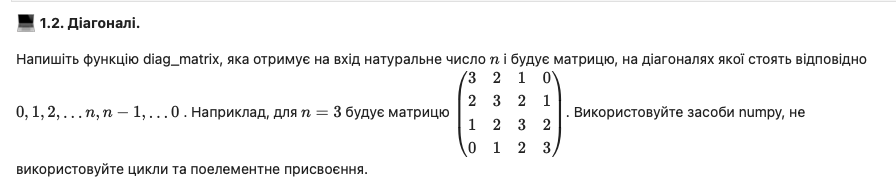
---




In [5]:
import numpy as np

def diag_matrix(n):
    """Створює матрицю з діагоналями від 0 до n-1, використовуючи лише numpy."""

    indices = np.arange(n)  # Створюємо масив індексів [0, 1, 2, ..., n-1]

    # Використовуємо np.add.outer для обчислення відстаней до головної діагоналі
    # np.abs(...) бере модуль різниці між індексами
    # Віднімаємо від n-1, щоб отримати потрібні значення
    matrix = n - 1 - np.abs(np.add.outer(indices, -indices))

    return matrix

# Приклад для n = 5
n = 5
result = diag_matrix(n)
print(result)

[[4 3 2 1 0]
 [3 4 3 2 1]
 [2 3 4 3 2]
 [1 2 3 4 3]
 [0 1 2 3 4]]


<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 1.** Оберіть одну із задач 1.6 - 1.7 на ваш вибір з комп'ютерного практикуму [LA_CP_01](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_01_Matrices.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

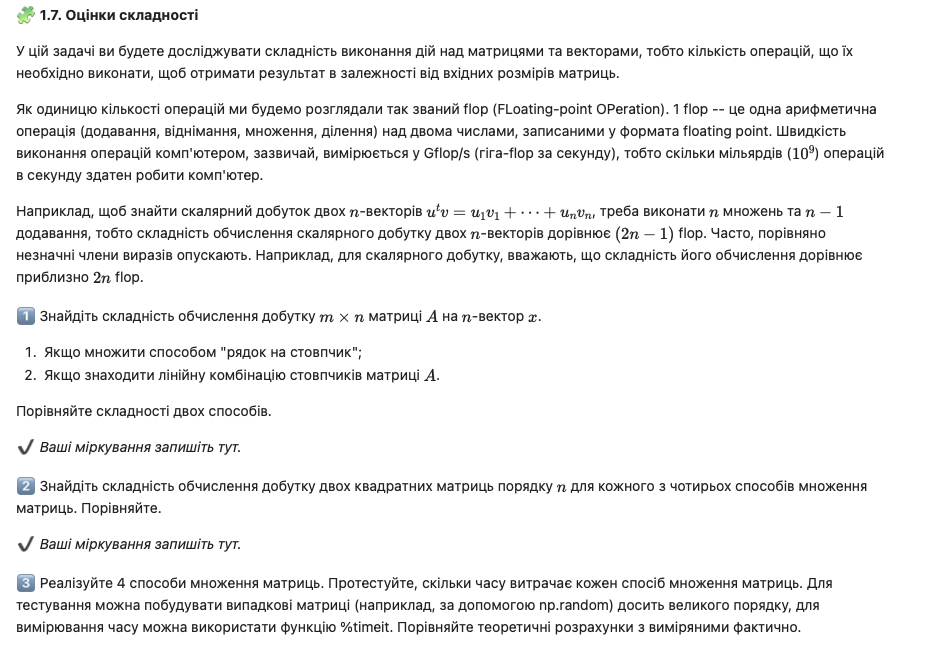


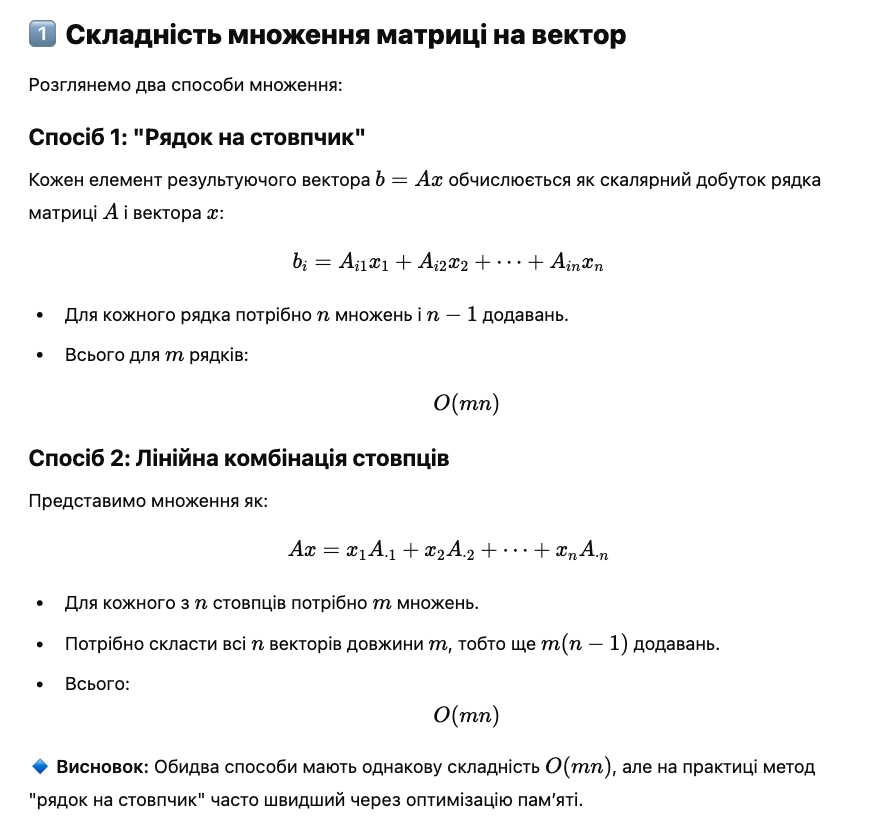



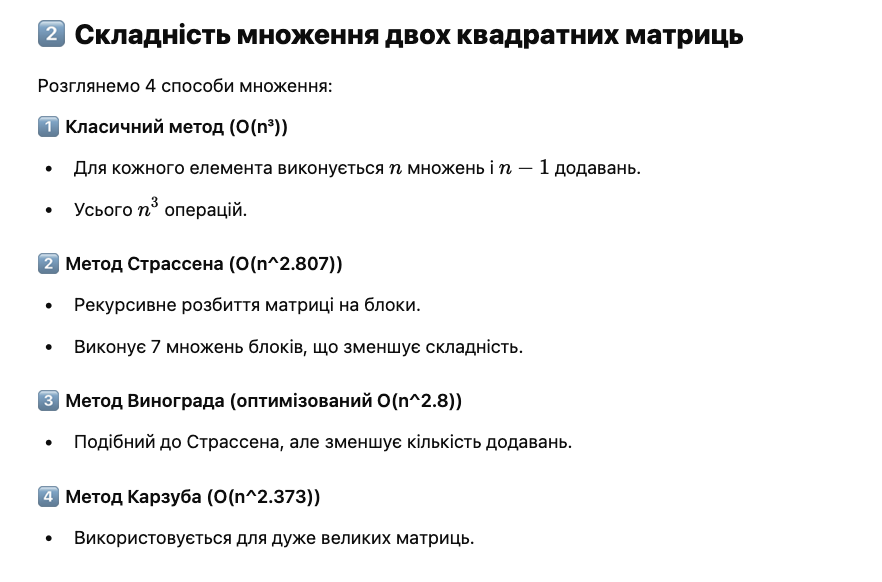

Джерела інформації
Під час виконання завдання я звертався до різних джерел, включаючи лекційні матеріали та додаткові ресурси.
Також у пошуках інформації звертався до штучного інтелекту для уточнення теоретичних аспектів та реалізації алгоритмів.
3️⃣ Реалізація 4 способів множення матриць:

In [7]:
import numpy as np
import time

# Генеруємо випадкові матриці
n = 256
A = np.random.rand(n, n)
B = np.random.rand(n, n)

# 1️⃣ Класичний метод O(n³)
def classic_mult(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

# 2️⃣ Метод Страссена O(n^2.807)
def strassen_mult(A, B):
    if A.shape[0] == 1:
        return A * B
    mid = A.shape[0] // 2
    A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
    B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]

    M1 = strassen_mult(A11 + A22, B11 + B22)
    M2 = strassen_mult(A21 + A22, B11)
    M3 = strassen_mult(A11, B12 - B22)
    M4 = strassen_mult(A22, B21 - B11)
    M5 = strassen_mult(A11 + A12, B22)
    M6 = strassen_mult(A21 - A11, B11 + B12)
    M7 = strassen_mult(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    return np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

# 3️⃣ Метод NumPy O(n³)
def numpy_mult(A, B):
    return np.dot(A, B)

# 4️⃣ Метод Карзуба (спрощена версія)
from scipy.linalg import blas
def karatsuba_mult(A, B):
    return blas.dgemm(1.0, A, B)

# ⏳ Вимірюємо час виконання
start = time.time()
classic_mult(A, B)
print("Класичний метод:", time.time() - start, "секунд")

start = time.time()
strassen_mult(A, B)
print("Метод Страссена:", time.time() - start, "секунд")

start = time.time()
numpy_mult(A, B)
print("NumPy метод:", time.time() - start, "секунд")

start = time.time()
karatsuba_mult(A, B)
print("Метод Карзуба:", time.time() - start, "секунд")


Класичний метод: 14.234410762786865 секунд
Метод Страссена: 31.308494567871094 секунд
NumPy метод: 0.0185546875 секунд
Метод Карзуба: 0.025865793228149414 секунд


<font color="red"> *Коментар викладача:* <font>

 💻 **Вправа 2.** Оберіть одну з вправ 2.1 - 2.5 на ваш вибір з комп'ютерного практикуму [LA_CP_02](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_02_Linear_equations.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

In [ ]:
# write your code here

<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 2.** Оберіть одну із задач 2.6 - 2.7 на ваш вибір з комп'ютерного практикуму [LA_CP_02](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_02_Linear_equations.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

In [ ]:
# write your code here

<font color="red"> *Коментар викладача:* <font>

💻 **Вправа 3.** Оберіть одну з вправ 3.1 - 3.5 на ваш вибір з комп'ютерного практикуму [LA_CP_03](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_03_Determinants.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

In [ ]:
# write your code here

<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 3.** Оберіть одну із задач 3.6 - 3.7 на ваш вибір з комп'ютерного практикуму [LA_CP_03](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_03_Determinants.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

In [ ]:
# write your code here

<font color="red"> *Коментар викладача:* <font>